#  T M V A_Tutorial_Regression_Tmva_App
TMVA example, for regression
 with following objectives:
 * Apply a BDT with TMVA




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, April 26, 2021 at 04:07 PM.</small></i>

In [1]:
from ROOT import TMVA, TFile, TTree, TCut, TH1F, TCanvas, gROOT, TLegend
from subprocess import call
from os.path import isfile
from array import array
 
gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Setup TMVA

In [2]:
TMVA.Tools.Instance()

Reader

In [3]:
reader = TMVA.Reader("Color:!Silent")
 

Inputs
=============
Load data

In [4]:
trfile = "SM_ttbar.root"
 
data = TFile.Open(trfile)
tree = data.Get('tree')
 

Set input variables

In [5]:
branches = {}
for branch in tree.GetListOfBranches():
    branchName = branch.GetName()
    branches[branchName] = array('f', [-999])
    tree.SetBranchAddress(branchName, branches[branchName])
    if not 'mtt' in branchName:
        reader.AddVariable(branchName, branches[branchName])
 

Book method(s)
=============
BDT

In [6]:
methodName1 = "BDT"
weightfile = 'dataset/weights/TMVARegression_{0}.weights.xml'.format(methodName1)
reader.BookMVA( methodName1, weightfile )

                         : Booking "BDT" of type "BDT" from dataset/weights/TMVARegression_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVARegression_BDT.weights.xml
DataSetInfo              : [Default] : Added class "Regression"
                         : Booked classifier "BDT" of type: "BDT"


BDTG

In [7]:
methodName2 = "BDTG"
weightfile = 'dataset/weights/TMVARegression_{0}.weights.xml'.format(methodName2)
reader.BookMVA( methodName2, weightfile )

                         : Booking "BDTG" of type "BDT" from dataset/weights/TMVARegression_BDTG.weights.xml.
                         : Reading weight file: dataset/weights/TMVARegression_BDTG.weights.xml
                         : Booked classifier "BDTG" of type: "BDT"


Loop events

In [8]:
nevents = tree.GetEntries()

Book histograms

In [9]:
tag = "SM"
hname="mtt_truth_{0}".format(tag)
nbins, xmin, xmax=200, 0, 2000
h1 = TH1F(hname, hname, nbins, xmin, xmax)
h1.Sumw2()
hname="mtt_reco_{0}".format(tag)
h2 = TH1F(hname, hname, nbins, xmin, xmax)
h2.Sumw2()
hname="BDT_{0}".format(tag)
h3 = TH1F(hname, hname, nbins, xmin, xmax)
h3.Sumw2()
hname="BDTG_{0}".format(tag)
h4 = TH1F(hname, hname, nbins, xmin, xmax)
h4.Sumw2()

for i in range(nevents):
  tree.GetEntry(i)

  mtt_truth = tree.mtt_truth     
  mtt_reco = tree.mtt_reco     
  # BDT = reader.EvaluateMVA(methodName1)
  # BDTG = reader.EvaluateMVA(methodName2)
  BDT = reader.EvaluateRegression(methodName1)[0]
  BDTG = reader.EvaluateRegression(methodName2)[0]
  h1.Fill(mtt_truth)
  h2.Fill(mtt_reco)
  h3.Fill(BDT)
  h4.Fill(BDTG)

Helper function to normalize hists

In [10]:
def norm_hists(h):

  h_new = h.Clone()
  hname = h.GetName() + "_normalized"
  h_new.SetName(hname)
  h_new.SetTitle(hname)
  ntot = h.Integral()
  if ntot!=0:
    h_new.Scale(1./ntot)

  return h_new

Plotting

In [11]:
myc = TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)
myc.cd()

Compare the performance

In [12]:
nh1 = norm_hists(h1)
nh1.GetXaxis().SetTitle("m_{t#bar{t}} [GeV]")
nh1.GetYaxis().SetTitle("A.U.")
nh1.Draw()
nh2 = norm_hists(h2)
nh2.SetLineColor(2)
nh2.SetMarkerColor(2)
nh2.Draw("same")
nh3 = norm_hists(h3)
nh3.SetLineColor(4)
nh3.SetMarkerColor(4)
nh3.Draw("same")
nh4 = norm_hists(h4)
nh4.SetLineColor(5)
nh4.SetMarkerColor(5)
nh4.Draw("same")

ymin = 0
ymax = max(nh1.GetMaximum(), nh2.GetMaximum(), nh3.GetMaximum())
nh1.GetYaxis().SetRangeUser(ymin, ymax*1.2)

Draw legends

Info in <TCanvas::Print>: png file TMVA_tutorial_reg_app_1.png has been created


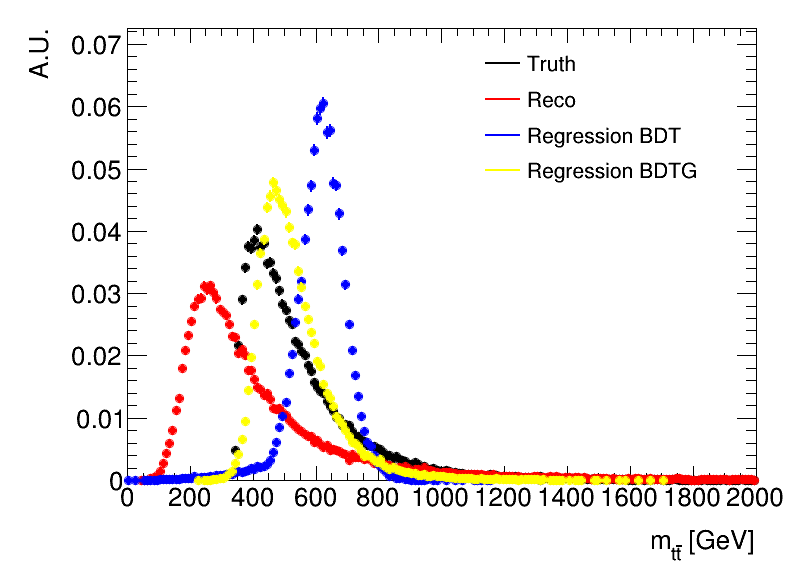

In [13]:
lIy = 0.92
lg = TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(nh1, "Truth", "l")
lg.AddEntry(nh2, "Reco", "l")
lg.AddEntry(nh3, "Regression BDT", "l")
lg.AddEntry(nh4, "Regression BDTG", "l")
lg.Draw()

myc.Draw()
myc.SaveAs("TMVA_tutorial_reg_app_1.png")

Draw all canvases 

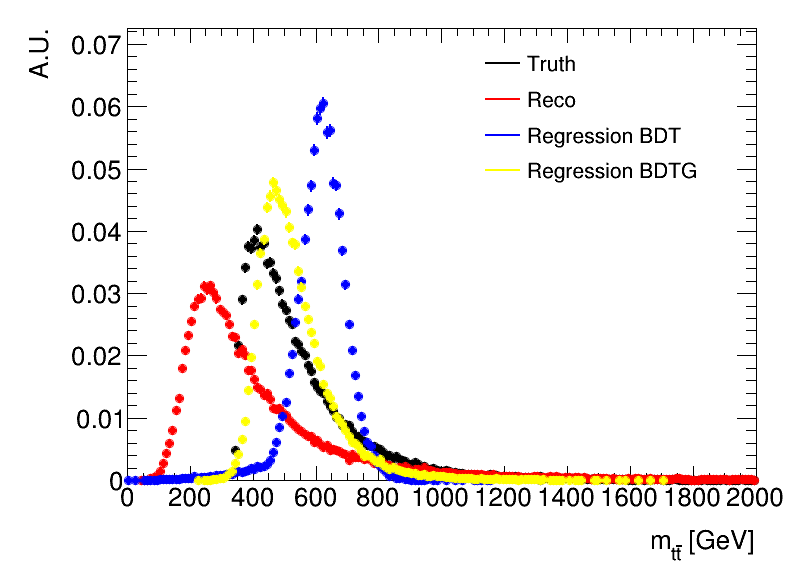

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()